# Convolutional Neural Networks

In [1]:
import numpy as np
from scipy import signal
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Conv1D, BatchNormalization, MaxPooling1D, Activation, Flatten, Conv2D, MaxPool2D

from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import os
import pickle

import pydot 
import graphviz

# MNIST data loading 


In [2]:
# loading data
#https://en.wikipedia.org/wiki/MNIST_database
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

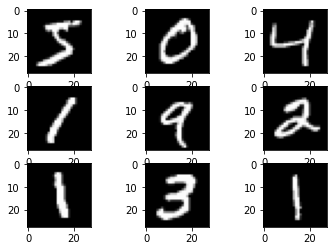

In [3]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

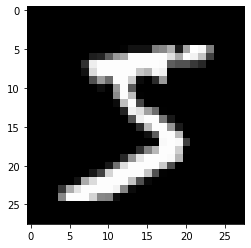

5


In [4]:
# data view
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(x_train[0],cmap=plt.cm.gray)
plt.show()
print(y_train[0])

In [5]:
# train data 
x_train.shape

(60000, 28, 28)

In [6]:
# test data 
x_test.shape

(10000, 28, 28)

# Convolutional Operation

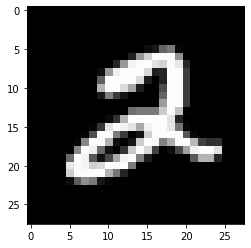

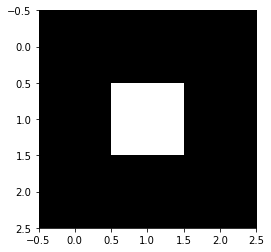

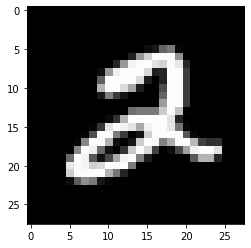

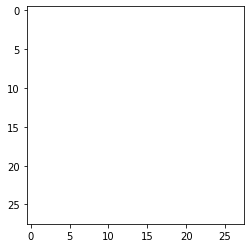

In [7]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 1, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
    filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

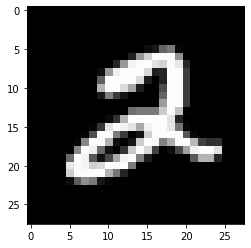

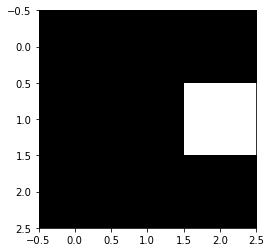

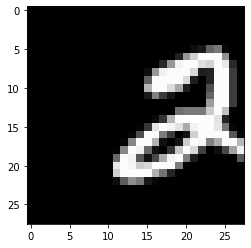

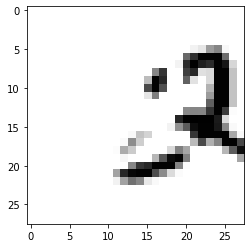

In [8]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 0, 1],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

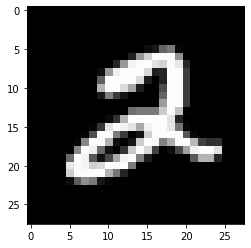

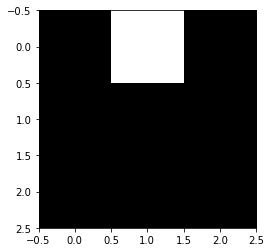

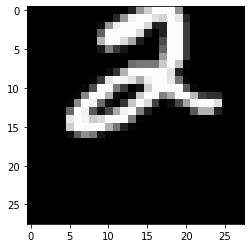

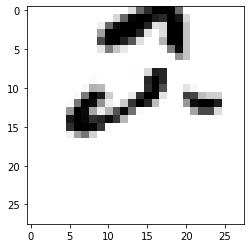

In [9]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 1., 0.],[0, 0, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

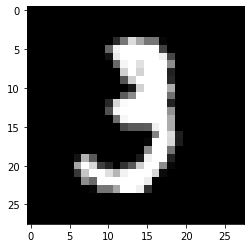

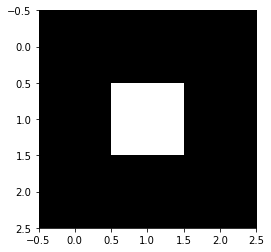

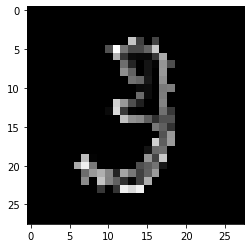

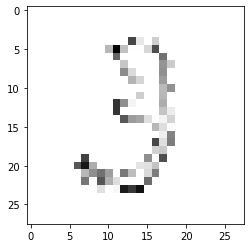

In [10]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[10]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[-1., -1., -1.],[-1., 8., -1.],[-1., -1., -1.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
# for i in range(0,2):
#     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

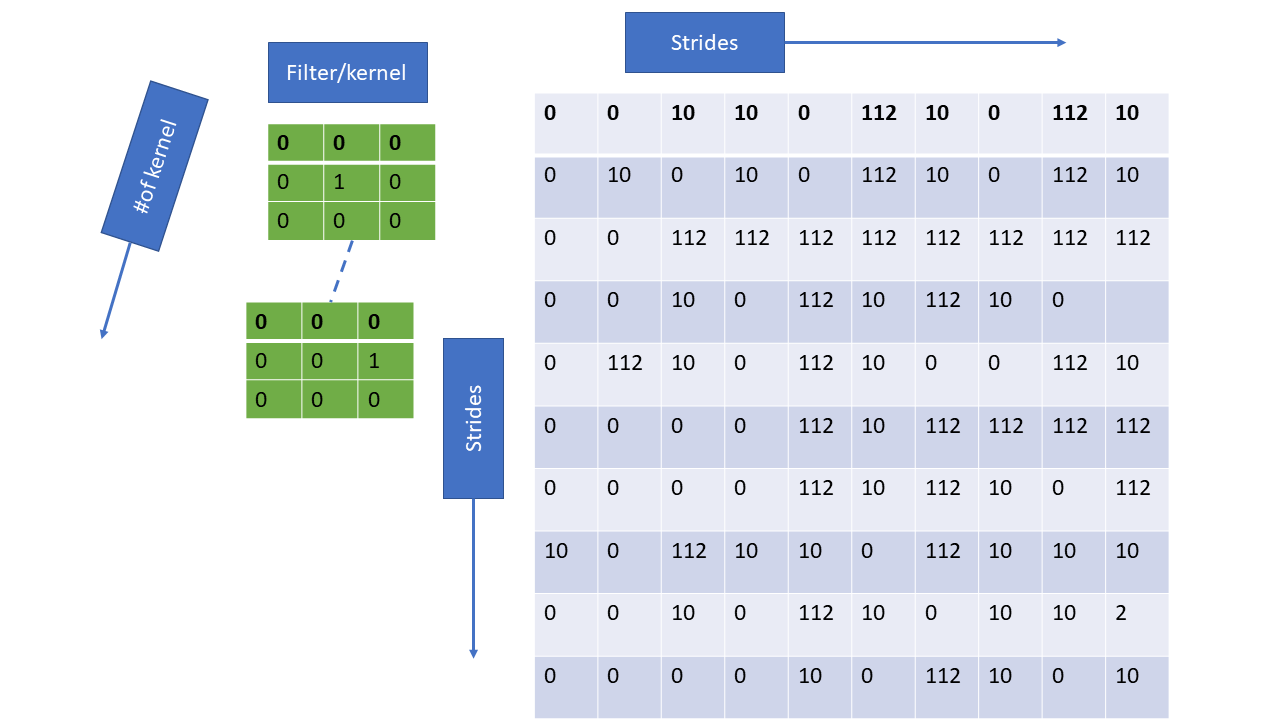

#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    activation=None,
    )

filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution). 

kernel_size:An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions. 

strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.

padding: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input. 

activation:	Activation function to use. If you don't specify anything, no activation is applied (see keras.activations). 

outputs is Shrinking 
Loosing information on corners of the image

Second method: (((W - K + 2P)/S) + 1)
        Here W = Input size
        K = Filter size
        S = Stride
        P = Padding 

        inpput_size - (filter_size - 1)

# Data pre-process

In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
#-1 means that the length in that dimension is inferred.

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [15]:
y_train_cat.shape

(60000, 10)

In [16]:
len(np.unique(y_train))

10

# Create a Sequential Model

In [17]:
model_sq = Sequential()

model_sq.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_sq.add(MaxPool2D(pool_size=(2, 2)))

model_sq.add(Conv2D(64, (3, 3), activation='relu'))
model_sq.add(MaxPool2D(pool_size=(2, 2)))

model_sq.add(Flatten())

model_sq.add(Dense(128, activation='relu'))

model_sq.add(Dense(10, activation='softmax'))

model_sq.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

What we ceated

In [18]:
model_sq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

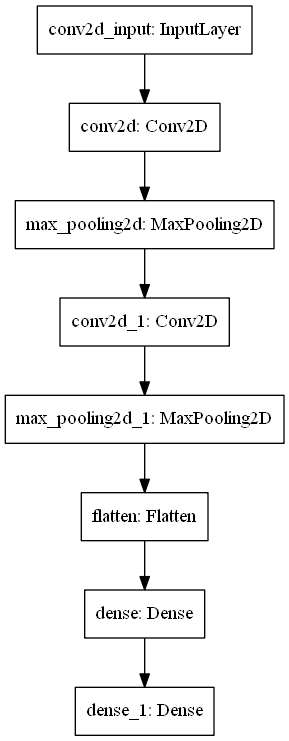

In [19]:

tf.keras.utils.plot_model(model_sq, "my_first_model.png")

In [20]:
#Train the model.model

In [21]:
model_sq_history = model_sq.fit(x_train, y_train_cat, batch_size=64,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 17s 26ms/step - loss: 0.1942 - accuracy: 0.9418 - val_loss: 0.0833 - val_accuracy: 0.9738
Epoch 2/5
657/657 [==============================] - 17s 26ms/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0511 - val_accuracy: 0.9849
Epoch 3/5
657/657 [==============================] - 14s 21ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0479 - val_accuracy: 0.9863
Epoch 4/5
657/657 [==============================] - 14s 21ms/step - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.0417 - val_accuracy: 0.9880
Epoch 5/5
657/657 [==============================] - 16s 25ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0480 - val_accuracy: 0.9863


In [22]:
def layer_visualizer(layer_name):
  
  layer_output=model_sq.get_layer(layer_name).output

  intermediate_model=tf.keras.models.Model(inputs=model_sq.input,outputs=layer_output)

  intermediate_prediction=intermediate_model.predict(x_train[0].reshape(1,28,28,1))
  
  row_size=8#4
  col_size=int(np.floor((np.shape(intermediate_prediction)[3])/row_size))
  
  img_index=0

  print(np.shape(intermediate_prediction))
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

      img_index=img_index+1

(1, 26, 26, 32)


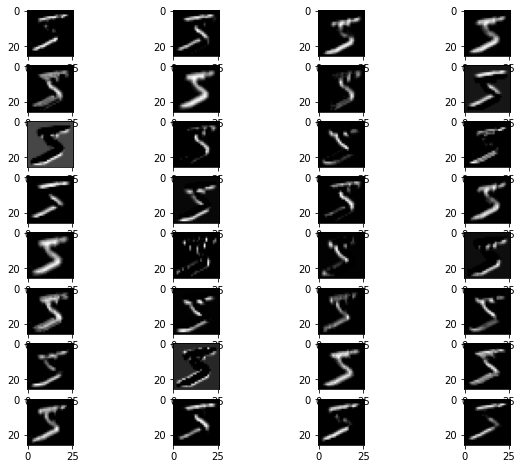

In [23]:
layer_visualizer('conv2d')

(1, 11, 11, 64)


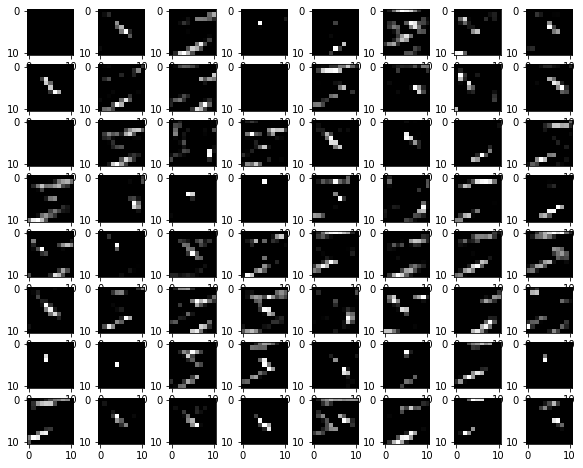

In [24]:
layer_visualizer('conv2d_1')

313/313 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9897
0.9897000193595886


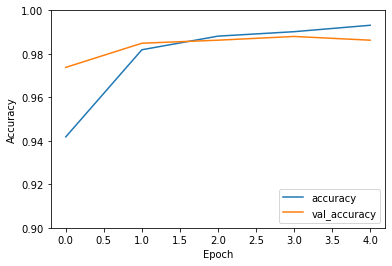

In [25]:
plt.plot(model_sq_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq.evaluate(x_test,  y_test_cat)
print(test_acc)

In [26]:
y_pred = model_sq.predict(x_test)

In [27]:
print(y_pred)

[[6.3453605e-08 8.6181515e-08 1.1477189e-06 ... 9.9998784e-01
  1.8078758e-08 9.3659401e-06]
 [1.7791202e-05 1.9071880e-06 9.9998021e-01 ... 1.2046408e-11
  1.8231702e-09 2.5159781e-12]
 [7.7057312e-06 9.9947375e-01 1.5114495e-05 ... 1.4018935e-04
  1.4464729e-04 3.7289499e-06]
 ...
 [3.7400007e-11 7.2407564e-09 1.0927059e-11 ... 8.3191631e-09
  3.5843013e-07 9.6506545e-09]
 [1.6656364e-05 5.4180493e-10 6.2954253e-10 ... 6.8094913e-08
  2.6754721e-03 2.4557701e-07]
 [2.7283236e-06 6.0768595e-09 4.3702471e-06 ... 7.1172324e-10
  7.2708991e-07 2.8186218e-09]]


In [28]:
y_pred_number=np.argmax(y_pred,axis=1)
print(y_pred_number)

[7 2 1 ... 4 5 6]


In [29]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(np.argmax(y_test_cat,axis=1), np.argmax(y_pred,axis=1))

In [30]:
print(cf_matrix)

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    1 1028    0    0    0    0    2    0    0]
 [   0    0    4 1002    0    0    0    3    1    0]
 [   0    1    1    0  973    0    0    0    3    4]
 [   2    0    1   12    0  869    1    1    2    4]
 [   5    2    1    0    2    1  945    0    2    0]
 [   0    2    7    0    1    0    0 1016    1    1]
 [   4    0    3    0    0    0    2    2  960    3]
 [   2    3    2    1    4    3    0    1    1  992]]


In [31]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]
model_sq_history=model_sq.fit(
    x_train, 
    y_train_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.3,
)

Epoch 1/20
657/657 [==============================] - 17s 25ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0454 - val_accuracy: 0.9876
Epoch 2/20
657/657 [==============================] - 19s 29ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0507 - val_accuracy: 0.9875
Epoch 3/20
657/657 [==============================] - 16s 24ms/step - loss: 0.0115 - accuracy: 0.9958 - val_loss: 0.0418 - val_accuracy: 0.9884
Epoch 00003: early stopping


313/313 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9900
0.9900000095367432
[[ 973    0    1    2    0    1    1    0    0    2]
 [   0 1126    1    3    0    1    4    0    0    0]
 [   0    0 1025    3    0    0    0    3    1    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    0    0  974    0    1    0    3    4]
 [   1    0    1    9    0  878    1    0    1    1]
 [   3    1    1    0    1    5  945    0    2    0]
 [   0    2    3    4    0    1    0 1013    1    4]
 [   2    0    1    3    0    1    0    0  965    2]
 [   1    0    0    1    3    5    0    1    3  995]]


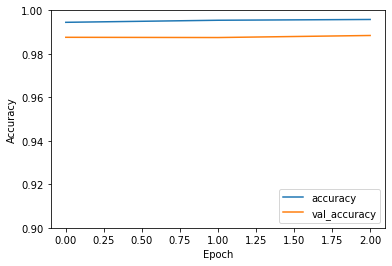

In [32]:
y_pred = model_sq.predict(x_test)
cf_matrix = confusion_matrix(np.argmax(y_test_cat,axis=1), np.argmax(y_pred,axis=1))
plt.plot(model_sq_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq.evaluate(x_test,  y_test_cat)
print(test_acc)
print(cf_matrix)

In [33]:
#save and load models
#https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model
model_sq.save('model')
loaded_model = tf.keras.models.load_model('model')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model\assets


# Create a Non Sequential Model (Functional Api)

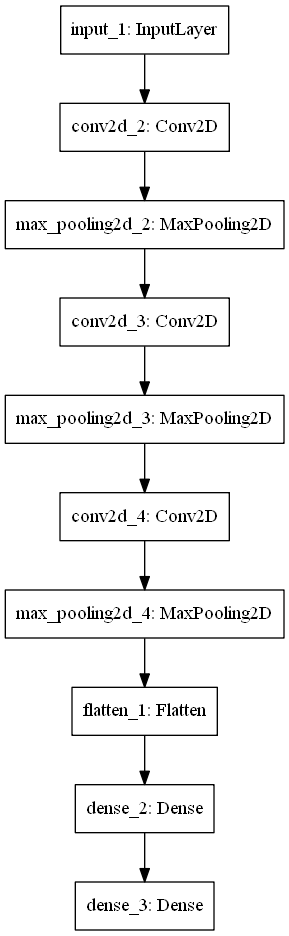

In [34]:
inputs = tf.keras.Input(shape=(28, 28, 1))

x=Conv2D(32, (3, 3), activation='relu')(inputs)
x=MaxPool2D(pool_size=(2, 2)) (x)

x1=Conv2D(64, (3, 3), activation='relu')(x)
x1=MaxPool2D(pool_size=(2, 2))(x1)

y1=Conv2D(64, (3, 3), activation='relu')(x1)
y1=MaxPool2D(pool_size=(2, 2))(y1)

y1=Flatten()(y1)

z=Dense(128, activation='relu')(y1)

outputs=Dense(10, activation='softmax')(z)


model_non_sq = tf.keras.Model(inputs=inputs, outputs=outputs)
model_non_sq.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
              
tf.keras.utils.plot_model(model_non_sq, "my_first_model.png")


In [35]:
model_non_sq_history=model_non_sq.fit(
    x_train, 
    y_train_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.3,
)

Epoch 1/20
657/657 [==============================] - 20s 30ms/step - loss: 0.3177 - accuracy: 0.9005 - val_loss: 0.1775 - val_accuracy: 0.9426
Epoch 2/20
657/657 [==============================] - 17s 26ms/step - loss: 0.0993 - accuracy: 0.9684 - val_loss: 0.0929 - val_accuracy: 0.9718
Epoch 3/20
657/657 [==============================] - 18s 28ms/step - loss: 0.0671 - accuracy: 0.9789 - val_loss: 0.0575 - val_accuracy: 0.9827
Epoch 4/20
657/657 [==============================] - 15s 22ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0574 - val_accuracy: 0.9829
Epoch 5/20
657/657 [==============================] - 17s 25ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.0546 - val_accuracy: 0.9833
Epoch 00005: early stopping


313/313 [==============================] - 1s 3ms/step - loss: 0.0527 - accuracy: 0.9856
0.9855999946594238


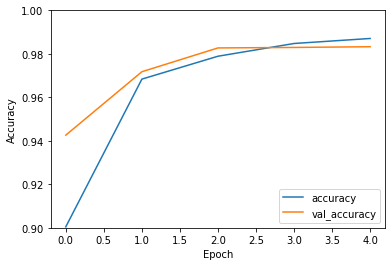

In [36]:
plt.plot(model_non_sq_history.history['accuracy'], label='accuracy')
plt.plot(model_non_sq_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_non_sq.evaluate(x_test,  y_test_cat)
print(test_acc)

In [37]:
inputs = tf.keras.Input(shape=(28, 28, 1))

x=Conv2D(32, (3, 3), activation='relu')(inputs)
x=MaxPool2D(pool_size=(2, 2)) (x)

x1=Conv2D(64, (3, 3), activation='relu')(x)
x1=MaxPool2D(pool_size=(2, 2))(x1)

y1=Conv2D(64, (3, 3), activation='relu')(x)
y1=MaxPool2D(pool_size=(2, 2))(y1)

z=tf.keras.layers.Concatenate(axis=1)([x1, y1])

z=Flatten()(z)

z=Dense(128, activation='relu')(z)

outputs=Dense(10, activation='softmax')(z)


model_non_sq_v2 = tf.keras.Model(inputs=inputs, outputs=outputs)
model_non_sq_v2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
model_non_sq_v2.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 26, 26, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 13, 13, 32)   0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 11, 11, 64)   18496       max_pooling2d_5[0][0]            
_______________________________________________________________________________________

In [39]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

model_non_sq_v2_history=model_non_sq_v2.fit(
    x_train,
    y_train_cat,
    epochs=5,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

Epoch 1/5
750/750 [==============================] - 27s 36ms/step - loss: 0.1562 - accuracy: 0.9509 - val_loss: 0.0605 - val_accuracy: 0.9820
Epoch 2/5
750/750 [==============================] - 28s 38ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0419 - val_accuracy: 0.9885
Epoch 3/5
750/750 [==============================] - 28s 37ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0448 - val_accuracy: 0.9883
Epoch 4/5
750/750 [==============================] - 30s 40ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0316 - val_accuracy: 0.9915
Epoch 5/5
750/750 [==============================] - 27s 36ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0437 - val_accuracy: 0.9898


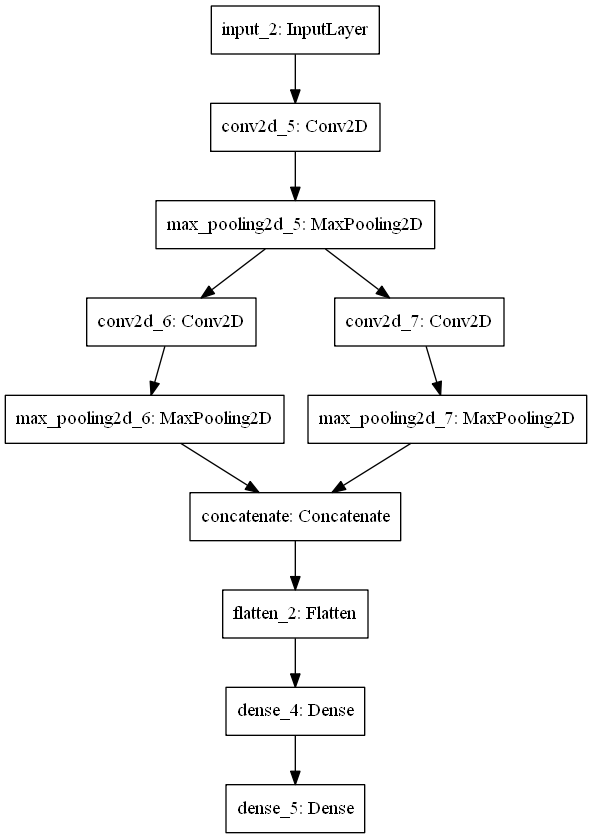

In [40]:
tf.keras.utils.plot_model(model_non_sq_v2, "model_non_sq.png")

313/313 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9912
0.9911999702453613


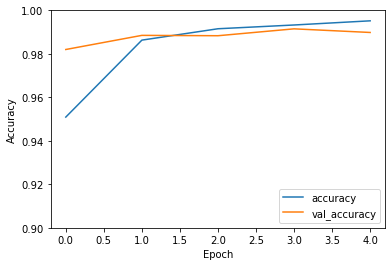

In [41]:
plt.plot(model_non_sq_v2_history.history['accuracy'], label='accuracy')
plt.plot(model_non_sq_v2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_non_sq_v2.evaluate(x_test,  y_test_cat)
y_test_pred = model_non_sq_v2.predict(x_test)
print(test_acc)

#  Color dataset cifar10

In [42]:
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = tf.keras.datasets.cifar10.load_data()

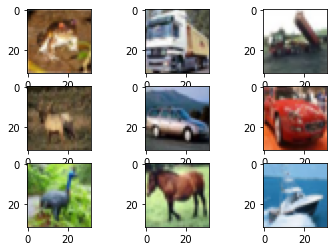

In [43]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train_cifar10[i])
# show the figure
plt.show()

In [44]:
x_train_cifar10.shape

(50000, 32, 32, 3)

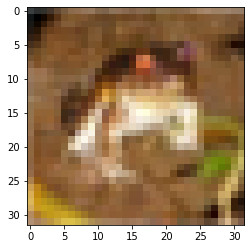

In [45]:
plt.imshow(x_train_cifar10[0])
plt.show()

In [46]:
#https://www.tensorflow.org/api_docs/python/tf/image/resize
train_resized_2828=tf.image.resize(x_train_cifar10,[28,28], method='nearest')
test_resized_2828=tf.image.resize(x_test_cifar10,[28,28], method='nearest')
y_train_cifar10_cat = to_categorical(y_train_cifar10, 10)
y_test_cifar10_cat = to_categorical(y_test_cifar10, 10)

In [47]:
model_sq_3ch = Sequential()

model_sq_3ch.add(Conv2D(32, (3, 3), activation='relu',padding="same", input_shape=(28, 28, 3)))
model_sq_3ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_3ch.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model_sq_3ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_3ch.add(Conv2D(124, (3, 3), padding="same", activation='relu'))
model_sq_3ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_3ch.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model_sq_3ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_3ch.add(Flatten())

model_sq_3ch.add(Dense(128, activation='relu'))

model_sq_3ch.add(Dense(10, activation='softmax'))

model_sq_3ch.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

model_sq_3ch_history=model_sq_3ch.fit(
    train_resized_2828,
    y_train_cifar10_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

Epoch 1/20
625/625 [==============================] - 27s 43ms/step - loss: 1.8042 - accuracy: 0.3891 - val_loss: 1.4518 - val_accuracy: 0.4675
Epoch 2/20
625/625 [==============================] - 32s 51ms/step - loss: 1.2977 - accuracy: 0.5325 - val_loss: 1.2730 - val_accuracy: 0.5424
Epoch 3/20
625/625 [==============================] - 32s 51ms/step - loss: 1.1498 - accuracy: 0.5880 - val_loss: 1.1566 - val_accuracy: 0.5894
Epoch 4/20
625/625 [==============================] - 30s 47ms/step - loss: 1.0448 - accuracy: 0.6312 - val_loss: 1.1156 - val_accuracy: 0.6089
Epoch 5/20
625/625 [==============================] - 30s 47ms/step - loss: 0.9519 - accuracy: 0.6609 - val_loss: 1.1064 - val_accuracy: 0.6182
Epoch 6/20
625/625 [==============================] - 29s 47ms/step - loss: 0.8759 - accuracy: 0.6894 - val_loss: 1.0736 - val_accuracy: 0.6330
Epoch 7/20
625/625 [==============================] - 30s 48ms/step - loss: 0.8265 - accuracy: 0.7049 - val_loss: 1.0615 - val_accuracy:

313/313 [==============================] - 2s 5ms/step - loss: 1.0849 - accuracy: 0.6400
0.6399999856948853


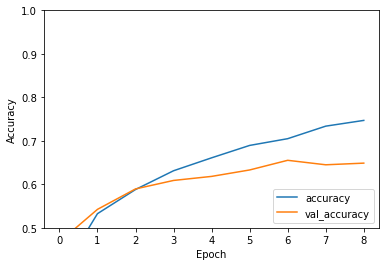

In [49]:
plt.plot(model_sq_3ch_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_3ch_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq_3ch.evaluate(test_resized_2828,  y_test_cifar10_cat)
y_test_pred = model_sq_3ch.predict(test_resized_2828)
print(test_acc)



In [50]:
grayscaled_train_2828 = tf.image.rgb_to_grayscale(train_resized_2828)
grayscaled_test_2828 = tf.image.rgb_to_grayscale(test_resized_2828)


In [51]:
model_sq_1ch = Sequential()

model_sq_1ch.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_sq_1ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_1ch.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model_sq_1ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_1ch.add(Conv2D(124, (3, 3), padding="same", activation='relu'))
model_sq_1ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_1ch.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model_sq_1ch.add(MaxPool2D(pool_size=(2, 2)))

model_sq_1ch.add(Flatten())

model_sq_1ch.add(Dense(128, activation='relu'))

model_sq_1ch.add(Dense(10, activation='softmax'))

model_sq_1ch.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

model_sq_1ch_history=model_sq_1ch.fit(
    grayscaled_train_2828,
    y_train_cifar10_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

Epoch 1/20
625/625 [==============================] - 26s 42ms/step - loss: 1.9270 - accuracy: 0.2932 - val_loss: 1.6619 - val_accuracy: 0.3848
Epoch 2/20
625/625 [==============================] - 22s 35ms/step - loss: 1.5451 - accuracy: 0.4366 - val_loss: 1.4582 - val_accuracy: 0.4796
Epoch 3/20
625/625 [==============================] - 22s 35ms/step - loss: 1.3557 - accuracy: 0.5130 - val_loss: 1.3994 - val_accuracy: 0.5033
Epoch 4/20
625/625 [==============================] - 24s 39ms/step - loss: 1.2226 - accuracy: 0.5680 - val_loss: 1.2713 - val_accuracy: 0.5531
Epoch 5/20
625/625 [==============================] - 24s 39ms/step - loss: 1.0980 - accuracy: 0.6142 - val_loss: 1.1840 - val_accuracy: 0.5998
Epoch 6/20
625/625 [==============================] - 29s 46ms/step - loss: 1.0099 - accuracy: 0.6518 - val_loss: 1.1342 - val_accuracy: 0.6106
Epoch 7/20
625/625 [==============================] - 27s 44ms/step - loss: 0.9450 - accuracy: 0.6705 - val_loss: 1.1198 - val_accuracy:

313/313 [==============================] - 1s 4ms/step - loss: 1.2216 - accuracy: 0.6231
0.6230999827384949


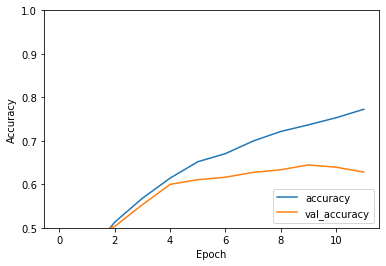

In [53]:
plt.plot(model_sq_1ch_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_1ch_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq_1ch.evaluate(grayscaled_test_2828,  y_test_cifar10_cat)
y_test_pred = model_sq_1ch.predict(grayscaled_test_2828)
print(test_acc)



#Transfer learning

In [54]:
print(model_non_sq.layers[-1].name)

dense_3


In [55]:
layer = tf.keras.layers.BatchNormalization()
print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))


weights: 0
trainable_weights: 0
non_trainable_weights: 0


In [56]:
for layer_number in range (0,len(model_sq.layers)-3):
    model_sq.layers[layer_number].trainable = False
    print('Layer ' +  model_sq.layers[layer_number].name + ' frozen.')

Layer conv2d frozen.
Layer max_pooling2d frozen.
Layer conv2d_1 frozen.
Layer max_pooling2d_1 frozen.


In [57]:
flat1 = Flatten()(model_sq.layers[-1].output)
class1 = Dense(124, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)
# define new model
model_transfer = tf.keras.Model(inputs=model_sq.inputs, outputs=output)

In [58]:
model_transfer.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=10,
        verbose=1,
    )
]

model_transfer_history=model_transfer.fit(
    x_train, 
    y_train_cat,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

Epoch 1/20
750/750 [==============================] - 8s 10ms/step - loss: 0.3044 - accuracy: 0.9768 - val_loss: 0.0774 - val_accuracy: 0.9866
Epoch 2/20
750/750 [==============================] - 7s 10ms/step - loss: 0.0300 - accuracy: 0.9945 - val_loss: 0.0587 - val_accuracy: 0.9894
Epoch 3/20
750/750 [==============================] - 7s 10ms/step - loss: 0.0222 - accuracy: 0.9960 - val_loss: 0.0736 - val_accuracy: 0.9866
Epoch 4/20
750/750 [==============================] - 8s 10ms/step - loss: 0.0217 - accuracy: 0.9956 - val_loss: 0.0705 - val_accuracy: 0.9889
Epoch 5/20
750/750 [==============================] - 8s 10ms/step - loss: 0.0189 - accuracy: 0.9965 - val_loss: 0.0658 - val_accuracy: 0.9894
Epoch 6/20
750/750 [==============================] - 7s 10ms/step - loss: 0.0174 - accuracy: 0.9967 - val_loss: 0.0708 - val_accuracy: 0.9886
Epoch 7/20
750/750 [==============================] - 7s 10ms/step - loss: 0.0173 - accuracy: 0.9970 - val_loss: 0.0715 - val_accuracy: 0.9884

313/313 [==============================] - 1s 4ms/step - loss: 0.0752 - accuracy: 0.9882
0.9882000088691711


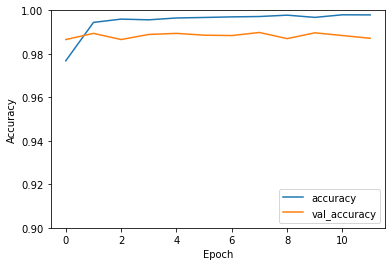

In [59]:
plt.plot(model_transfer_history.history['accuracy'], label='accuracy')
plt.plot(model_transfer_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_transfer.evaluate(x_test,  y_test_cat)
y_test_pred = model_transfer.predict(x_test)
print(test_acc)



# 1 D CNN

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/S2Mostafa/dataSpo2/main/XTest_trans.csv")
x_test_Spo2= df.to_numpy()

In [61]:
x_test_Spo2.shape

(1933, 3000)

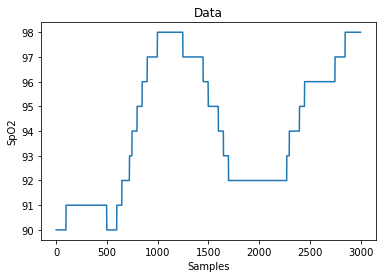

In [62]:
# plotting
plt.title("Data")
plt.xlabel("Samples")
plt.ylabel("SpO2")
plt.plot(x_test_Spo2[0][0:3000])
plt.show()

In [63]:
x_test_Spo2 = np.expand_dims(x_test_Spo2, axis = 2)

In [64]:
x_test_Spo2.shape

(1933, 3000, 1)

In [79]:
df_train_x = pd.read_csv("https://raw.githubusercontent.com/S2Mostafa/dataSpo2/main/X_train_trans.csv")
x_train_Spo2 = df_train_x.to_numpy()
x_train_Spo2 = np.expand_dims(x_train_Spo2, axis = 2)
df_ytest = pd.read_csv("https://raw.githubusercontent.com/S2Mostafa/dataSpo2/main/test_y_hot.csv")
y_test_Spo2= df_ytest.to_numpy()
df_ytrain = pd.read_csv("https://raw.githubusercontent.com/S2Mostafa/dataSpo2/main/train_y_hot.csv")
y_train_Spo2= df_ytrain.to_numpy()

In [94]:
#create model
model_conv1 = tf.keras.Sequential()

#get number of columns in training data
n_cols_2 = x_train_Spo2.shape[1]
print("------>", str(n_cols_2))


#add layers to model
model_conv1.add(Conv1D(15, 9, strides=5, padding='same', input_shape=(3000,1))) #Conv_1
model_conv1.add(Activation("relu"))
model_conv1.add(BatchNormalization(axis=-1)) #Batch_1
model_conv1.add(MaxPooling1D(pool_size=5, strides=5, padding='same')) #MaxP_1
model_conv1.add(Conv1D(12, 8, strides=3, padding='same'))   #Conv_2
model_conv1.add(Activation("relu"))
model_conv1.add(BatchNormalization(axis=-1)) #Batch_1
model_conv1.add(Conv1D(8, 8, strides=3, padding='same'))    #Conv_3
model_conv1.add(Activation("relu"))
model_conv1.add(BatchNormalization(axis=-1)) #Batch_1
model_conv1.add(Conv1D(13, 4, strides=2, padding='same'))   #Conv_4
model_conv1.add(Activation("relu"))
model_conv1.add(BatchNormalization(axis=-1)) #Batch_1
model_conv1.add(Flatten())
model_conv1.add(Dense(117)) #20-200
model_conv1.add(Dense(2, activation='softmax'))

------> 3000


In [95]:
model_conv1.compile(loss='binary_crossentropy',
                  optimizer='adam',metrics=['accuracy'])
                  #metrics=[tf.keras.metrics.Accuracy()])
#model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True))

model_conv1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 600, 15)           150       
_________________________________________________________________
activation_16 (Activation)   (None, 600, 15)           0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 600, 15)           60        
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 120, 15)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 40, 12)            1452      
_________________________________________________________________
activation_17 (Activation)   (None, 40, 12)            0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 40, 12)           

In [96]:
model_conv1_history=model_conv1.fit(
    x_train_Spo2, 
    y_train_Spo2,
    epochs=20,
    batch_size=64,
    validation_split=0.3,
)

Epoch 1/20
22/22 [==============================] - 1s 34ms/step - loss: 0.3309 - accuracy: 0.8739 - val_loss: 14.9784 - val_accuracy: 0.0220
Epoch 2/20
22/22 [==============================] - 1s 25ms/step - loss: 0.1846 - accuracy: 0.9514 - val_loss: 14.6065 - val_accuracy: 0.0220
Epoch 3/20
22/22 [==============================] - 1s 26ms/step - loss: 0.1578 - accuracy: 0.9609 - val_loss: 11.6403 - val_accuracy: 0.0220
Epoch 4/20
22/22 [==============================] - 1s 28ms/step - loss: 0.1556 - accuracy: 0.9630 - val_loss: 7.7977 - val_accuracy: 0.0220
Epoch 5/20
22/22 [==============================] - 1s 26ms/step - loss: 0.1547 - accuracy: 0.9601 - val_loss: 6.7234 - val_accuracy: 0.0220
Epoch 6/20
22/22 [==============================] - 1s 29ms/step - loss: 0.1513 - accuracy: 0.9652 - val_loss: 6.8351 - val_accuracy: 0.0220
Epoch 7/20
22/22 [==============================] - 1s 27ms/step - loss: 0.1433 - accuracy: 0.9674 - val_loss: 3.7296 - val_accuracy: 0.0220
Epoch 8/20

In [97]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

model_conv1_history=model_conv1.fit(
    x_train_Spo2, 
    y_train_Spo2,
    epochs=200,
    batch_size=128,
    callbacks=callbacks,
    validation_split=0.3,
)

Epoch 1/200
11/11 [==============================] - 0s 34ms/step - loss: 0.0965 - accuracy: 0.9797 - val_loss: 5.8410 - val_accuracy: 0.0456
Epoch 2/200
11/11 [==============================] - 0s 40ms/step - loss: 0.0932 - accuracy: 0.9804 - val_loss: 4.6750 - val_accuracy: 0.0456
Epoch 3/200
11/11 [==============================] - 1s 48ms/step - loss: 0.0895 - accuracy: 0.9826 - val_loss: 6.2042 - val_accuracy: 0.0456
Epoch 4/200
11/11 [==============================] - 0s 45ms/step - loss: 0.0893 - accuracy: 0.9826 - val_loss: 7.6098 - val_accuracy: 0.0439
Epoch 00004: early stopping


61/61 [==============================] - 0s 3ms/step - loss: 4.3385 - accuracy: 0.4356
0.4355923533439636


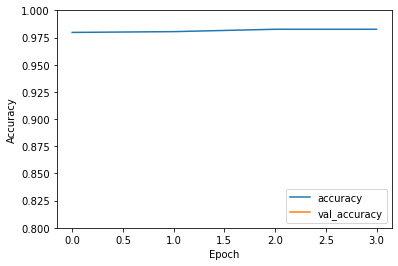

In [100]:
plt.plot(model_conv1_history.history['accuracy'], label='accuracy')
plt.plot(model_conv1_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_conv1.evaluate(x_test_Spo2,  y_test_Spo2)
y_test_pred = model_conv1.predict(x_test_Spo2)
print(test_acc)

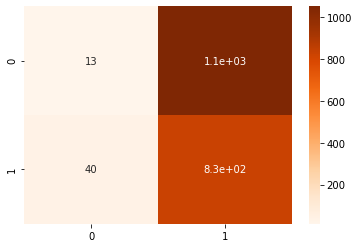

In [101]:
import seaborn as sn
columns = range(0,2)
confm = confusion_matrix(np.argmax(y_test_Spo2,axis=1),np.argmax(y_test_pred,axis=1))
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Oranges', annot=True) 